In [169]:
from sklearn import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import pandas as pd

In [170]:
# Reading the data
df = pd.read_csv("Boston.csv")

In [171]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Set Description

**Variable** | **__ Description__** |** Type**
---|---|---
CRIM|CRIM: per capita crime rate by town|Float
ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|float
INDUS|proportion of non-retail business acres per town |float
CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |Qualitative
NOX|nitric oxides concentration (parts per 10 million) |float
RM|Average number of rooms|float
AGE|proportion of owner-occupied units built prior to 1940 |float
DIS|weighted distances to five Boston employment centres|float
RAD|Index of accessibility to radial highways|Integer
TAX|full value property tax rate per 10,000 USD |Integer
PTRATIO|pupil-teacher ratio by town | float
B|B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |Float
LSTAT| Percent of lower status of the population |FLoat
MEDV|Median value of owner-occupied homes in $1000's|float


- Response Variable = Medv
- Problem Statement - Predict Median value of owner occupied home using Linear Regression




In [172]:

df.info()
# There are a total of 506 rows and none NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### Exploratory Data Analysis

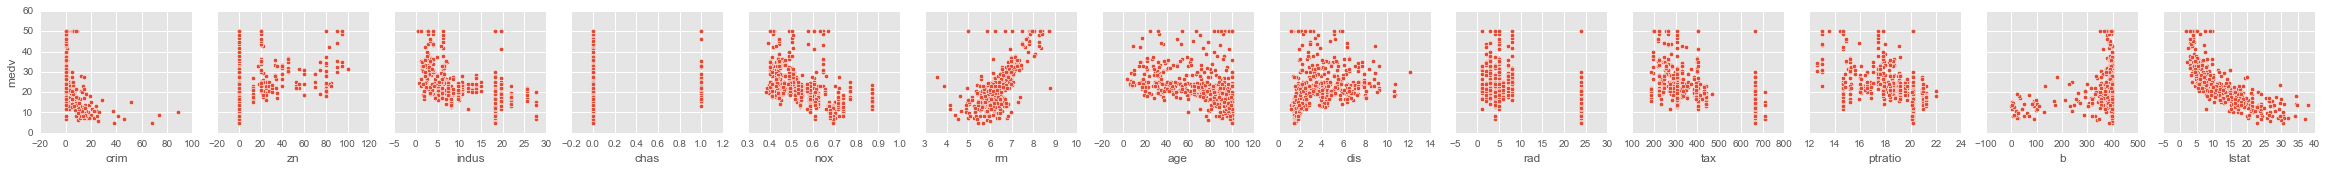

In [173]:
plt.figure(figsize=(20,10))
sns.pairplot(data = df , x_vars = ["crim", "zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"],y_vars = ["medv"])


### Simple linear regression with 1 variable 

In [174]:
model_sm = smf.ols(formula = 'medv~lstat',data = df).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 13 Sep 2016   Prob (F-statistic):           5.08e-88
Time:                        14:36:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretaion of Regression of Median Home values and Lstat(% of lower status of Population)
- Slope of coefficient is -.95 , suggesting that for every unit increase in LSTAT the median Home value decreases by 95 K on an avg
- The R square value is .544, suggesting that ~55% variation in Median Home price is explained by LSTAT
- The 95% conf. interval falles between [-1.026 , -0.874] indicating that there is 95% chances that the true value(populatation ) of LSTAT falls between this range
- The low P-values indicate that both ,intercept and coefficient are statistically significant and provide string eveidence againt Null Hypothesis,H0

In [175]:
df['y_hat'] = model_sm.predict()

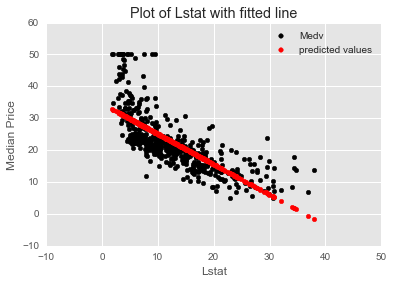

In [176]:
fig = plt.plot()
plt.scatter(x = df.lstat , y = df.medv , color = 'k' , label = 'Medv')
plt.scatter(x = df.lstat , y = y_hat , color = 'r' , label = 'predicted values')
plt.legend(loc = 'best')
plt.xlabel('Lstat')
plt.ylabel('Median Price')
# sns.lmplot(x = "lstat" , y = "y_hat" , data = df , x_jitter = .7)
plt.title('Plot of Lstat with fitted line')

plt.show()

In [177]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,y_hat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,29.822595
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.870390
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.725142
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.760696
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,29.490078


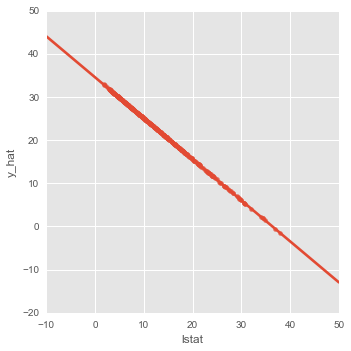

In [178]:
# Plotiing the lm plots , showing the confidence interval
sns.lmplot(x = "lstat" , y = "y_hat" , data = df)

In [179]:
# calculating the prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(model_sm)





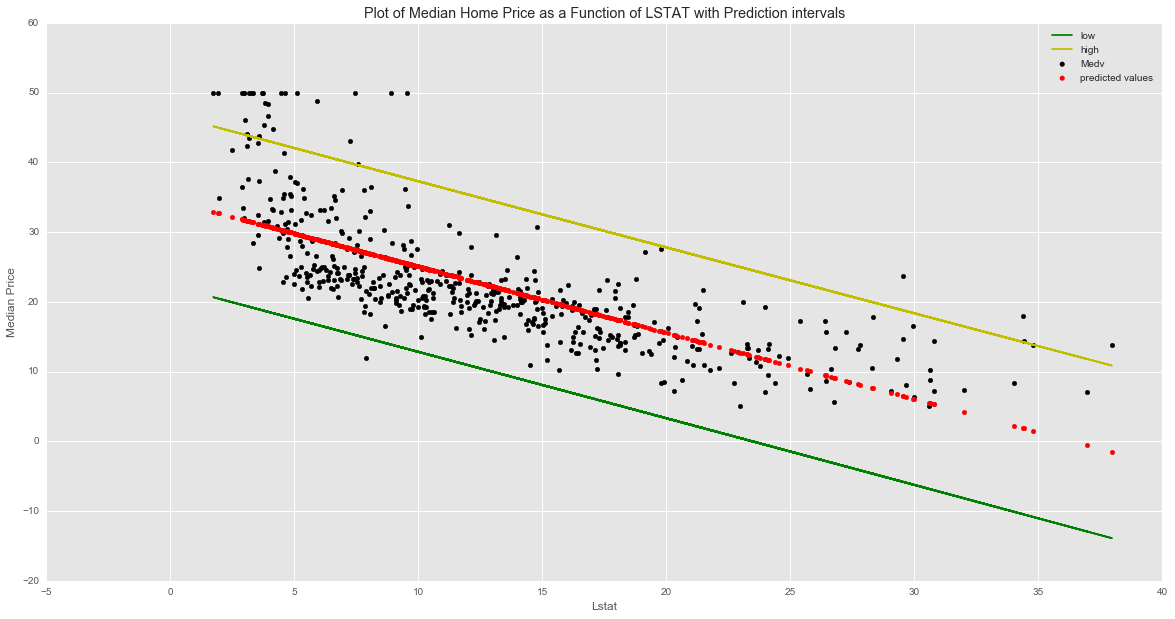

In [180]:
plt.figure(figsize=(20,10))
plt.plot( df.lstat ,  iv_l , color = 'g'  ,label = 'low')
plt.plot( df.lstat ,  iv_u , color = 'y'  ,label = 'high')
plt.scatter(x = df.lstat , y = df.medv , color = 'k' , label = 'Medv')
plt.scatter(x = df.lstat , y = y_hat , color = 'r' , label = 'predicted values')
plt.legend(loc = 'best')
plt.xlabel('Lstat')
plt.ylabel('Median Price')
plt.title('Plot of Median Home Price as a Function of LSTAT with Prediction intervals')



 As Evident,
 - Predcition interval is wider than confidence interval

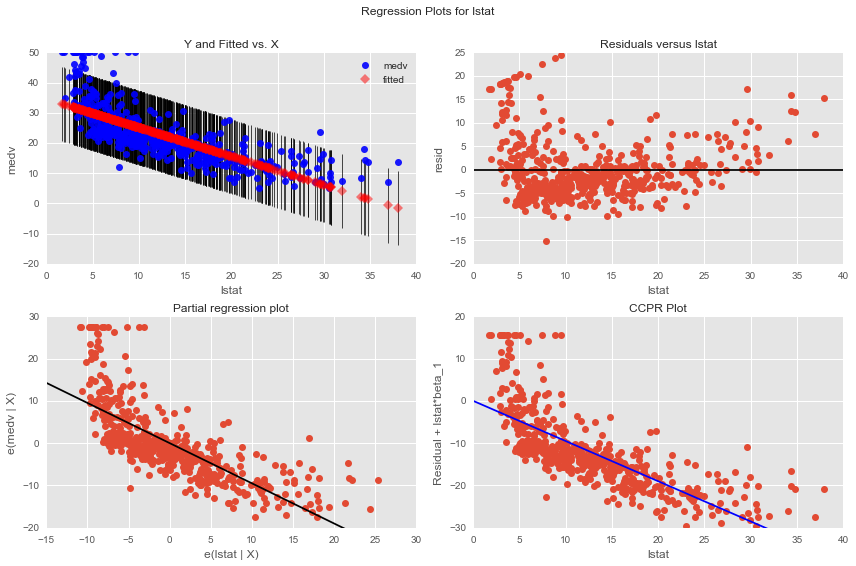

In [181]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model_sm, 'lstat', fig = figure)


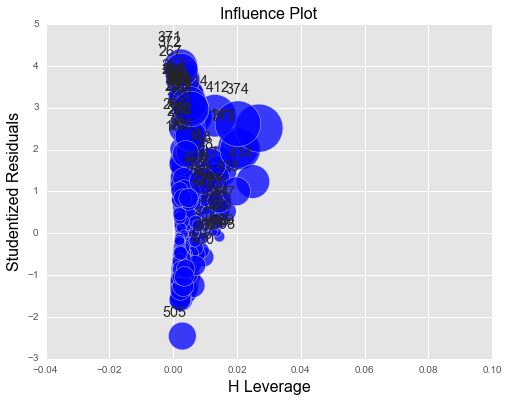

In [182]:

fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(model_sm, ax=ax)



#### Findings based on the residual plots
- Outliers - The plot of leverage V/S the studentized ratio suggests that there are no potential outliers that are exerting unusual influence on the fit
- Non Linerity - The residual plot suggests that there could be non linearity in the dependent variable and the quality of the it can be improved by transformation

##                                       Multiple Linear Regression

In [183]:
df.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv', u'y_hat'],
      dtype='object')

In [184]:
# Creating a multi regression Model
model_sm_multi = smf.ols(formula = 'medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat' , data = df).fit()

In [185]:
model_sm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Sep 2016   Prob (F-statistic):          6.72e-135
Time:                        14:36:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
zn             0.0464      0.014      3.382      0.001         0.019     0.073
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
chas           2.6867      0.862      3.118      0.002         0.994     4.380
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
rm             3.8099      0.418      9.116      0.000         2.989     4.631
age            0.0007      0.013      0.052      0.958        -0.025     0.027
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
rad            0.3060      0.066      4.613      0.000         0.176     0.436
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
b              0.0093      0.003      3.467      0.001         0.004     0.015
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Findings - 
- ~ 74% of variation in the Median home prices can be explained by the 13 dependent variables together
- Null hypothesis, H0, is true for the variables - indus , age as is evident by their high p values 

In [186]:
# df.loc[0]['lstat']

In [197]:
# The code below calculates the VIF to determine Multicollinearity

from sklearn import linear_model
# initializing the X variable/feature Matrix
X = df[['crim' , 'zn' , 'indus' ,'chas' , 'nox' , 'rm' , 'age' , 'dis' , 'rad' , 'tax' , 'ptratio' , 'b'  ,'lstat']] 
# initializing and empty list to hold the values for VIF
vif = []
for i in range(0,len(X.columns)):
    y_dash = X[[i]] # Response variable
    z = X.drop(X[[i]],axis = 1) # feature Matrix
    # Using SK Learn to calculate the score
    model_temp = linear_model.LinearRegression().fit(z,y_dash)
    r_2 = model_temp.score(z,y_dash)
    
    temp_vif = 1 / (1 - r_2)

    print temp_vif
    vif.append(temp_vif)
    
    
    

1.79219154743
2.29875817875
3.99159641835
1.07399532755
4.39371984758
1.93374443578
3.10082551282
3.95594490637
7.48449633527
9.0085539476
1.79908404925
1.34852107641
2.94149107809


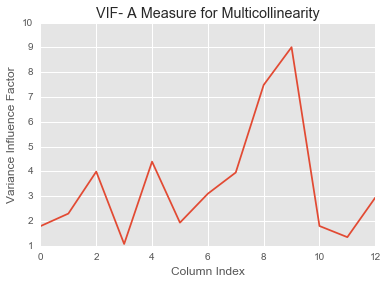

In [188]:
plt.plot(vif)
plt.xlabel('Column Index')
plt.ylabel('Variance Influence Factor')
plt.title('VIF- A Measure for Multicollinearity')


#### Column with index 9 seems to have a high degree of collineraity

In [190]:
df.columns[9]

'tax'

In [191]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,y_hat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.543993


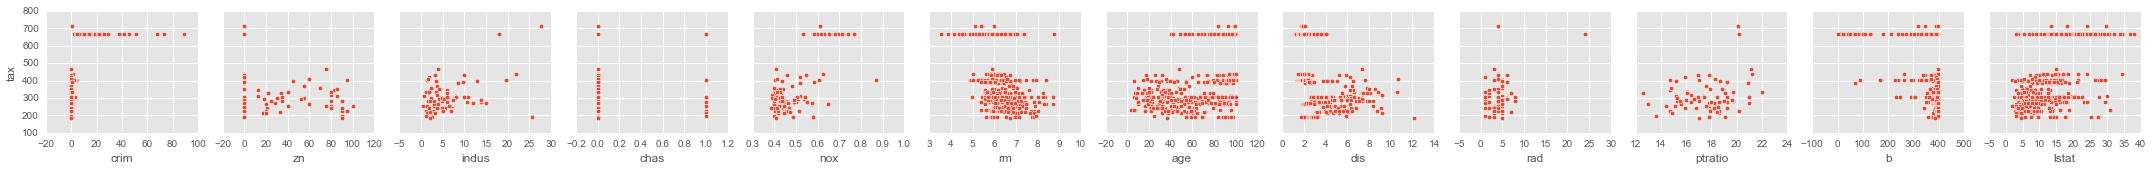

In [192]:
plt.figure(figsize=(20,10))
sns.pairplot(data = df , x_vars = ["crim", "zn","indus","chas","nox","rm","age","dis","rad","ptratio","b","lstat"],y_vars = ["tax"])


#### Conclusion:
- Tax is highly corelated with rad and indus, a future Model could be used without these variables to get the score

In [193]:
model_non_collinear = smf.ols(formula = 'medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad  + ptratio + b + lstat' , data = df).fit()

In [194]:
model_non_collinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Tue, 13 Sep 2016   Prob (F-statistic):          1.21e-133
Time:                        15:35:54   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.6286      5.123      6.760      0.000        24.563    44.694
crim          -0.1067      0.033     -3.216      0.001        -0.172    -0.042
zn             0.0364      0.014      2.692      0.007         0.010     0.063
indus         -0.0678      0.056     -1.214      0.225        -0.177     0.042
chas           3.0292      0.864      3.507      0.000         1.332     4.726
nox          -18.7012      3.847     -4.862      0.000       -26.259   -11.143
rm             3.9117      0.421      9.294      0.000         3.085     4.739
age           -0.0006      0.013     -0.045      0.964        -0.027     0.026
dis           -1.4883      0.201     -7.390      0.000        -1.884    -1.093
rad            0.1346      0.041      3.262      0.001         0.054     0.216
ptratio       -0.9851      0.132     -7.478      0.000        -1.244    -0.726
b              0.0095      0.003      3.521      0.000         0.004     0.015
lstat         -0.5222      0.051    -10.198      0.000        -0.623    -0.422
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Note:
- After dropping Tax as one of the regressor the fir just got reduced marginally from 74 to 73.5
- Also the quality of the fit can be improved further by dropping the variables that have a high p values , i.e indus, age

In [195]:
model_non_collinear_H0 = smf.ols(formula = 'medv ~ crim + zn  + chas + nox + rm  + dis + rad  + ptratio + b + lstat' , data = df).fit()

In [196]:
model_non_collinear_H0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Tue, 13 Sep 2016   Prob (F-statistic):          1.84e-135
Time:                        15:41:06   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.7123      5.103      6.803      0.000        24.687    44.738
crim          -0.1048      0.033     -3.164      0.002        -0.170    -0.040
zn             0.0366      0.013      2.731      0.007         0.010     0.063
chas           2.9679      0.861      3.448      0.001         1.277     4.659
nox          -20.3144      3.472     -5.850      0.000       -27.137   -13.492
rm             3.9771      0.408      9.754      0.000         3.176     4.778
dis           -1.4294      0.187     -7.647      0.000        -1.797    -1.062
rad            0.1288      0.041      3.157      0.002         0.049     0.209
ptratio       -1.0149      0.129     -7.867      0.000        -1.268    -0.761
b              0.0097      0.003      3.591      0.000         0.004     0.015
lstat         -0.5281      0.048    -11.019      0.000        -0.622    -0.434
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.418
Skew:                           1.441   Prob(JB):                    2.40e-149
Kurtosis:                       7.915   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Effect

In [199]:
# lets caluclate the model quality after including the interaction between lstat(Percent of lower status of the population)
# and age( age of the House)

# Principal Of Hierarchy- Note that even though we have excluded age earlier due to its high p values ,we are including that again ,
# due to its presence in Hierarchial term
model_interaction = smf.ols(formula = 'medv ~ crim + zn+ age  + chas + nox + rm  + dis + rad  + ptratio + b + lstat+lstat*age' , data = df).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.6
Date:                Wed, 14 Sep 2016   Prob (F-statistic):          1.90e-133
Time:                        05:19:08   Log-Likelihood:                -1504.7
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.1707      5.496      6.581      0.000        25.373    46.969
crim          -0.1083      0.033     -3.233      0.001        -0.174    -0.042
zn             0.0334      0.014      2.362      0.019         0.006     0.061
age           -0.0112      0.019     -0.585      0.559        -0.049     0.027
chas           2.9908      0.864      3.464      0.001         1.294     4.687
nox          -20.5262      3.652     -5.620      0.000       -27.702   -13.350
rm             3.9367      0.422      9.336      0.000         3.108     4.765
dis           -1.4318      0.196     -7.290      0.000        -1.818    -1.046
rad            0.1299      0.041      3.166      0.002         0.049     0.211
ptratio       -1.0200      0.130     -7.853      0.000        -1.275    -0.765
b              0.0096      0.003      3.535      0.000         0.004     0.015
lstat         -0.6317      0.148     -4.254      0.000        -0.923    -0.340
lstat:age      0.0012      0.002      0.751      0.453        -0.002     0.004
==============================================================================
Omnibus:                      168.906   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.995
Skew:                           1.455   Prob(JB):                    3.66e-153
Kurtosis:                       7.983   Cond. No.                     3.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Note- 
- In this particular setting including an interaction term in the model between age and lstat did not result in a better fit as is evident from the high p values of age and lstat

### Polynomial Regression


- As is evident from the residual plot and the scatter plot between medv and lstat, the lstat(Percent of lower status of the population) variable bears a non linear relation ship to the response variable.

In [206]:
df['lstat_2'] = df.lstat**2

In [207]:
model_poly = smf.ols(formula = 'medv ~ crim + zn + chas + nox + rm  + dis + rad  + ptratio + b + lstat +lstat_2' , data = df).fit()

In [208]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 14 Sep 2016   Prob (F-statistic):          7.79e-156
Time:                        05:35:16   Log-Likelihood:                -1454.1
No. Observations:                 506   AIC:                             2932.
Df Residuals:                     494   BIC:                             2983.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     40.9332      4.657      8.789      0.000        31.783    50.083
crim          -0.1471      0.030     -4.860      0.000        -0.207    -0.088
zn             0.0133      0.012      1.080      0.281        -0.011     0.038
chas           2.7880      0.779      3.577      0.000         1.257     4.319
nox          -15.8228      3.172     -4.988      0.000       -22.056    -9.590
rm             3.3627      0.374      8.998      0.000         2.628     4.097
dis           -1.3040      0.170     -7.687      0.000        -1.637    -0.971
rad            0.1334      0.037      3.612      0.000         0.061     0.206
ptratio       -0.8427      0.118     -7.146      0.000        -1.074    -0.611
b              0.0085      0.002      3.464      0.001         0.004     0.013
lstat         -1.6984      0.120    -14.190      0.000        -1.934    -1.463
lstat_2        0.0338      0.003     10.491      0.000         0.027     0.040
==============================================================================
Omnibus:                      133.452   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.561
Skew:                           1.087   Prob(JB):                    7.91e-135
Kurtosis:                       7.956   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
# Calling Anova function to perfrom hypothesis test on the 2 models
# H0== Both the model perform equally well
#Ha== one of the model is superior

from statsmodels.stats.api import anova_lm
sm.stats.anova_lm(model_non_collinear_H0, model_poly, typ=1)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,495.0,11354.983231,0.0,NaN,NaN,NaN
1,494.0,9286.119985,1.0,2068.863246,110.058716,2.211790e-23


As is evident from the low p values of ANOVA test that one of the Model is superior to the other